# Covid 19
## Column Definitions
* USMER : This indicates whether the patient treated medical units of the first, second or third level
* MEDICAL_UNIT : The type of institution of the Natinal Health System that provided the care.
* SEX : 1-"Female", 2-"male".
* PATIENT_TYPE : The type of care the patient received in the unit. 1-"returned home", 2-"hospitalization". 97 and 99 are missing data.
* DATE_DIED : Indicated date of death means that the patient died, except for 9999-99-99 which means that the patient survived..
* INTUBED : Wether the patient was connected to a ventilator. 1-"yes", 2-"no"
* PNEUMONIA : Whether the patient already have air sacs inflamation or not.1-"yes", 2-"no", while 97 and 99 are missing data.
* AGE: The patient's age.
* PREGNANT: Whether the patient is pregnant or not.1-"yes", 2-"no", while 97 and 99 are missing data.
* DIABETES : Whether the patient has diabetes or not.
* COPD : Whether the patient has chronic obstructive pulmonary disease or not.
* ASTHMA : Whether the patient has asthma or not.
* INMSUPR : Whether the patient is immunosuppressed or not.
* HYPERTENSION : Whether the patient has hypertension or not.
* OTHER DISEASE : Whether the patient has other disease or not.
* CARDIOVASCULAR : Whether the patient has patient has heart or blood vessels related diseases.
* OBESITY : Whether the patient is obessed or not.
* RENAL CHRONIC : Whether the patient has chronic renal disease or not.
* TOBACCO : Whether the patient is a tobacco user or not.
* CLASIFFICATION_FINAL : Covid test findings. Values 1-3 means that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* ICU : Whether the patient has been admitted into the intensive care unit.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df=pd.read_csv("Covid Data.csv")
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [9]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [11]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [12]:
df[:1000000].shape

(1000000, 21)

In [18]:
df2=pd.DataFrame(df[:500000])

In [19]:
df2.to_csv("Covid Reduced.csv")

# Let's Start

## Column Definitions
* USMER : This indicates whether the patient treated medical units of the first, second or third level
* MEDICAL_UNIT : The type of institution of the Natinal Health System that provided the care.
* SEX : 1-"Female", 2-"male".
* PATIENT_TYPE : The type of care the patient received in the unit. 1-"returned home", 2-"hospitalization". 97 and 99 are missing data.
* DATE_DIED : Indicated date of death means that the patient died, except for 9999-99-99 which means that the patient survived..
* INTUBED : Wether the patient was connected to a ventilator. 1-"yes", 2-"no"
* PNEUMONIA : Whether the patient already have air sacs inflamation or not.1-"yes", 2-"no", while 97 and 99 are missing data.
* AGE: The patient's age.
* PREGNANT: Whether the patient is pregnant or not.1-"yes", 2-"no", while 97 and 99 are missing data.
* DIABETES : Whether the patient has diabetes or not.
* COPD : Whether the patient has chronic obstructive pulmonary disease or not.
* ASTHMA : Whether the patient has asthma or not.
* INMSUPR : Whether the patient is immunosuppressed or not.
* HYPERTENSION : Whether the patient has hypertension or not.
* OTHER DISEASE : Whether the patient has other disease or not.
* CARDIOVASCULAR : Whether the patient has patient has heart or blood vessels related diseases.
* OBESITY : Whether the patient is obessed or not.
* RENAL CHRONIC : Whether the patient has chronic renal disease or not.
* TOBACCO : Whether the patient is a tobacco user or not.
* CLASIFFICATION_FINAL : Covid test findings. Values 1-3 means that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* ICU : Whether the patient has been admitted into the intensive care unit.

# EDA - Data Wrangling

In [4]:
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv("Covid Reduced.csv",index_col=0)

In [48]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [49]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [50]:
data.drop(columns=["DATE_DIED","PATIENT_TYPE","PREGNANT"],axis=1,inplace=True)

In [51]:
#PNEUMONIA : Whether the patient already have air sacs inflamation or not.1-"yes", 2-"no", while 97 and 99 are missing data.
data["PNEUMONIA"].replace(97,None ,inplace=True)
data["PNEUMONIA"].replace(99,None ,inplace=True)

In [52]:
data["PNEUMONIA"].isnull().sum()

0

In [53]:
data[data["PNEUMONIA"] == 97]

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


<AxesSubplot:>

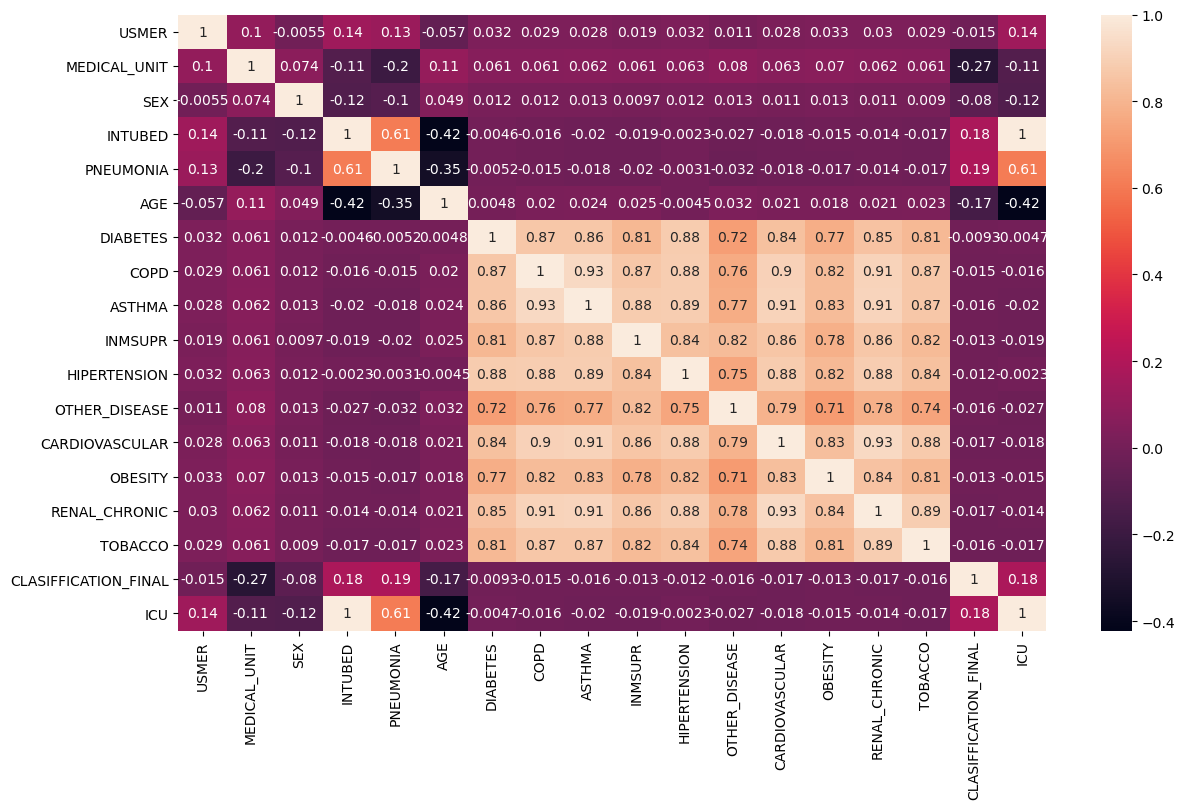

In [54]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)

# Outlier Removal

In [55]:
data.nunique()

USMER                     2
MEDICAL_UNIT             12
SEX                       2
INTUBED                   4
PNEUMONIA                 2
AGE                     114
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

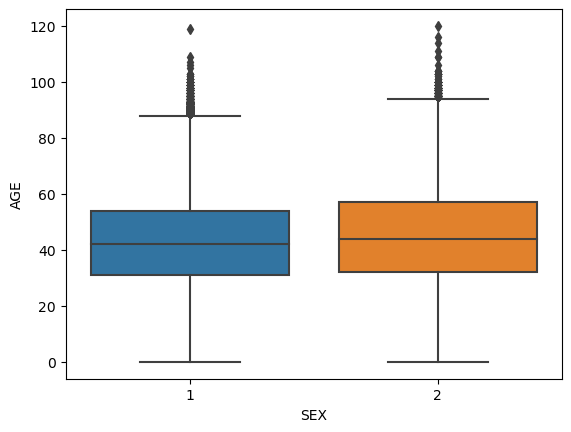

In [56]:
sns.boxplot(data=data, y="AGE",x="SEX")

In [59]:
df2=pd.DataFrame(data[data["AGE"]<90])

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

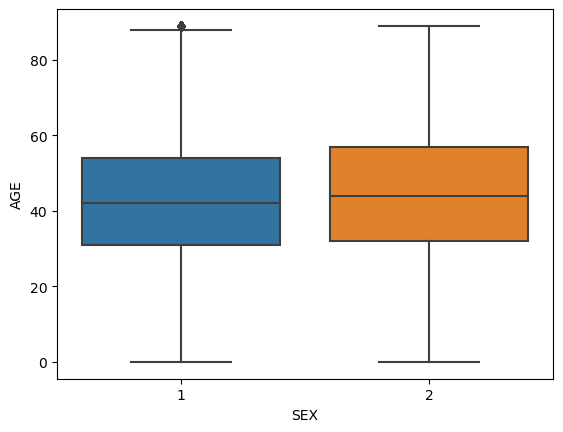

In [60]:
sns.boxplot(data=df2, y="AGE",x="SEX")

In [61]:
df2.shape

(497642, 18)

# Data Normalization

In [65]:
from sklearn.preprocessing import MinMaxScaler

scalar= MinMaxScaler()

df2["AGE"] = scalar.fit_transform(df2[["AGE"]])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497642 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 497642 non-null  int64  
 1   MEDICAL_UNIT          497642 non-null  int64  
 2   SEX                   497642 non-null  int64  
 3   INTUBED               497642 non-null  int64  
 4   PNEUMONIA             497642 non-null  int64  
 5   AGE                   497642 non-null  float64
 6   DIABETES              497642 non-null  int64  
 7   COPD                  497642 non-null  int64  
 8   ASTHMA                497642 non-null  int64  
 9   INMSUPR               497642 non-null  int64  
 10  HIPERTENSION          497642 non-null  int64  
 11  OTHER_DISEASE         497642 non-null  int64  
 12  CARDIOVASCULAR        497642 non-null  int64  
 13  OBESITY               497642 non-null  int64  
 14  RENAL_CHRONIC         497642 non-null  int64  
 15  

In [66]:
df2.describe()

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000
mean,1.579067,5.662750,1.515093,68.188549,1.783551,0.495865,2.220100,2.328379,2.318237,2.385406,2.159798,2.453454,2.333280,2.180503,2.323238,2.296583,4.889706,68.231407
std,0.493709,2.838894,0.499773,43.757476,0.411824,0.191999,6.010561,5.769170,5.791656,6.207842,5.871100,6.896556,5.856992,5.806228,5.794178,5.991542,1.903804,43.699957
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,2.000000,2.000000,0.359551,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,2.000000,97.000000,2.000000,0.483146,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,6.000000,2.000000,97.000000,2.000000,0.629213,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,12.000000,2.000000,99.000000,2.000000,1.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [68]:
#INTUBED : Wether the patient was connected to a ventilator. 1-"yes", 2-"no"
df2["INTUBED"].unique

<bound method Series.unique of 0         97
1         97
2          1
3         97
4         97
          ..
499995    97
499996    97
499997    97
499998     2
499999    97
Name: INTUBED, Length: 497642, dtype: int64>

In [70]:
df2["INTUBED"].value_counts()

97    342376
2     119888
1      30808
99      4570
Name: INTUBED, dtype: int64

In [71]:
342376+4570

346946

#INTUBED : Wether the patient was connected to a ventilator. 1-"yes", 2-"no" 
# Contains alot of null values

In [73]:
df2.drop(columns=["INTUBED"],axis=1,inplace=True)

In [75]:
df2.describe()

,USMER,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000
mean,1.579067,5.662750,1.515093,1.783551,0.495865,2.220100,2.328379,2.318237,2.385406,2.159798,2.453454,2.333280,2.180503,2.323238,2.296583,4.889706,68.231407
std,0.493709,2.838894,0.499773,0.411824,0.191999,6.010561,5.769170,5.791656,6.207842,5.871100,6.896556,5.856992,5.806228,5.794178,5.991542,1.903804,43.699957
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,2.000000,0.359551,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,2.000000,2.000000,0.483146,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,6.000000,2.000000,2.000000,0.629213,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,12.000000,2.000000,2.000000,1.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [80]:
df2.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [79]:
df2["ASTHMA"].value_counts()

2     479955
1      15872
98      1815
Name: ASTHMA, dtype: int64

In [86]:
#All contains null values as 98
cols=['DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',"ICU"]

for i in cols:
    #print (i)
    df2[i].replace(98,None,inplace=True)
    #df2 = df2[df2[i] < 98]
    df2.fillna(df2[i].mode()[0],inplace=True)

In [87]:
df2.describe()

,USMER,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000
mean,1.579067,5.662750,1.515093,1.783551,0.495865,1.844024,1.980667,1.968007,1.982512,1.801641,1.956201,1.974928,1.830131,1.972597,1.922209,4.889706,68.231407
std,0.493709,2.838894,0.499773,0.411824,0.191999,0.362833,0.137693,0.175981,0.131083,0.398765,0.204647,0.156345,0.375518,0.163255,0.267842,1.903804,43.699957
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,2.000000,0.359551,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,2.000000,2.000000,0.483146,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,6.000000,2.000000,2.000000,0.629213,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,12.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,99.000000


In [88]:
df2["ICU"].value_counts()

97    342376
2     137688
1      12972
99      4606
Name: ICU, dtype: int64

In [89]:
df2.drop(columns=["ICU"], axis=1,inplace=True)

In [90]:
df2.describe()

,USMER,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000
mean,1.579067,5.662750,1.515093,1.783551,0.495865,1.844024,1.980667,1.968007,1.982512,1.801641,1.956201,1.974928,1.830131,1.972597,1.922209,4.889706
std,0.493709,2.838894,0.499773,0.411824,0.191999,0.362833,0.137693,0.175981,0.131083,0.398765,0.204647,0.156345,0.375518,0.163255,0.267842,1.903804
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,2.000000,0.359551,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2.000000,4.000000,2.000000,2.000000,0.483146,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000
75%,2.000000,6.000000,2.000000,2.000000,0.629213,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000
max,2.000000,12.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000


CLASIFFICATION_FINAL : Covid test findings. Values 1-3 means that the patient was diagnosed with covid in different degrees 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

* So lets keep it simple by targeting only Yes Or No i.e. if values are 1,2,3 replace them 1 "Yes" , 4,5,6,7 replace them with 0 "No"

In [93]:
def help1(x):
    if x in [1,2,3]:
        return 1
    else :
        return 0

In [97]:
help1(3)

1

In [99]:
df2["CLASIFFICATION_FINAL"] = df2["CLASIFFICATION_FINAL"].apply(help1)

In [100]:
df2.describe()

,USMER,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000,497642.000000
mean,1.579067,5.662750,1.515093,1.783551,0.495865,1.844024,1.980667,1.968007,1.982512,1.801641,1.956201,1.974928,1.830131,1.972597,1.922209,0.465025
std,0.493709,2.838894,0.499773,0.411824,0.191999,0.362833,0.137693,0.175981,0.131083,0.398765,0.204647,0.156345,0.375518,0.163255,0.267842,0.498776
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,2.000000,0.359551,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,2.000000,4.000000,2.000000,2.000000,0.483146,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,6.000000,2.000000,2.000000,0.629213,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,12.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [101]:
df2.to_csv("ML Covid Data.csv")

# Machine Learning

In [2]:
df2=pd.read_csv("ML Covid Data.csv")

<AxesSubplot:>

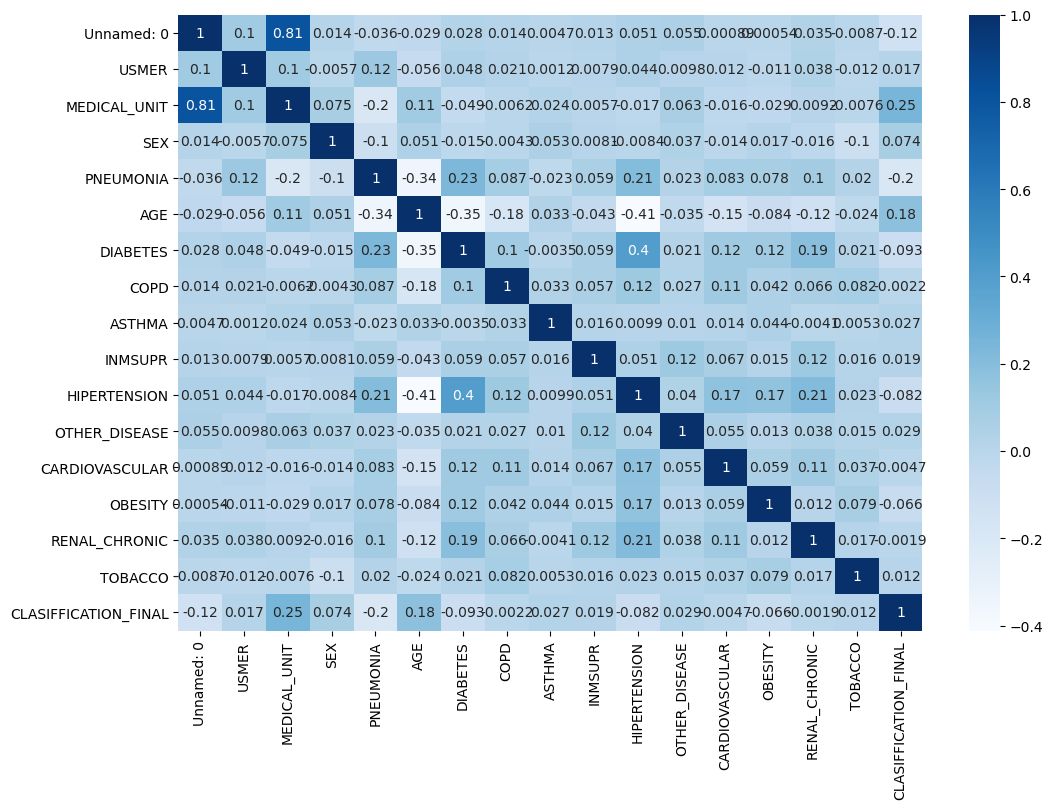

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, cmap="Blues")

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df2.drop(columns=["CLASIFFICATION_FINAL"],axis=1)
y=df2["CLASIFFICATION_FINAL"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Model

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

lr.score(X_test,y_test)

0.5359976207891585

# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtr=DecisionTreeClassifier()

dtr.fit(X_train,y_train)

dtr.score(X_test,y_test)

0.9866892798868268

In [15]:
y_pred = dtr.predict(X_test)
cm=confusion_matrix(y_test , y_pred)
cm

array([[65926,   757],
       [  899, 56829]], dtype=int64)

<AxesSubplot:>

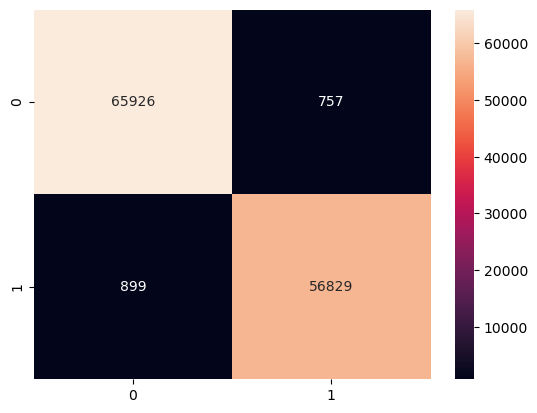

In [17]:
sns.heatmap(cm, annot=True, fmt="g")

#s

## Select The Best Model

In [ ]:
# define the 5 models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), SVC(), RandomForestClassifier()]
model_names = ["Logistic Regression", "Decision Tree", "KNN", "Naive Bayes", "SVM", "Random Forest"]

# train and evaluate each model
#best_index = 0
#best_score = 0
model_scores=[]
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    #if score > best_score:
     #   best_index = i
      #  best_score = score
    model_scores.append(model_names[i] + " : " + str(score))
        
# print the best model
#print("Best model is: ", model_names[best_index])
#print("And its score is:", best_score)
print(model_scores)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
